# Image Thresholding
If value is above, it is object
If it is below or equal, it is background


In [4]:
#Load images
import cv2
import numpy as np
import matplotlib.pyplot as plt


C:\Users\shady\AppData\Local\Temp\ipykernel_35164\44611642.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histMaxY = int(hist[histMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_35164\44611642.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  greyMaxY = int(hist[greyMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_35164\44611642.py:51: RuntimeWarning: invalid value encountered in scalar divide
  m = (p2[1] - p1[1]) / (p2[0] - p1[0])
C:\Users\shady\AppData\Local\Temp\ipykernel_35164\44611642.py:60: RuntimeWarning: invalid value encountered in cast
  line_array[valid_indices] = (m * x_values[valid_indices] + b).astype(int)


dist = 0 at: 0


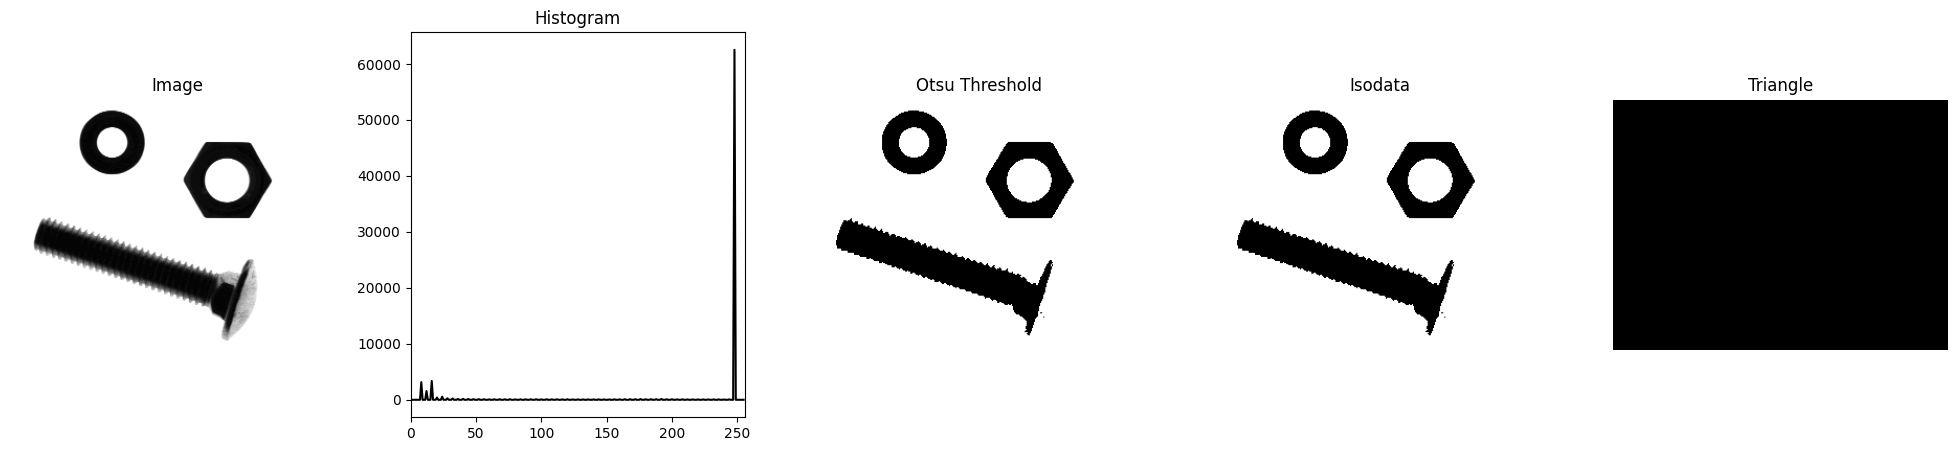

In [62]:
# Hardware image    
img = cv2.imread("Hardware.png", cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Otsu's Method
ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#IsoData method
t = 0.4
while True:
    # Create a boolean mask where True represents values less than the threshold
    mask = img < t*255
    # Calculate the mean of elements that satisfy the condition
    mu1 = np.mean(img[mask])
    mask2 = img >= t*255
    mu2 = np.mean(img[mask2])
    
    tNew = ((mu1 + mu2)/2)/255

    if (abs(t - tNew) < 0.01):
       break
    t = tNew
    # print("Isodata Threshold = "+ t.astype(str))


ret2,th2 = cv2.threshold(img,int(255*t),255,cv2.THRESH_BINARY)

### Triangle method
## Find max position of histogram
histMaxX = int(hist.argmax())
histMaxY = int(hist[histMaxX])
p1 = np.array([histMaxX,histMaxY])

## find highest grey value
# Find the indices (bins) where the highest non-zero values occur
non_zero_indices = np.where(hist > 0)
# Find the bin with the highest non-zero value
greyMaxX = 0
for idx, val in np.ndenumerate(hist):
    #print("idx: " + str(idx) + " val: " +  str(int(val)))
    if int(val) > 0:
        greyMaxX = idx[0]
#print(greyMaxX)
greyMaxY = int(hist[greyMaxX])
p2 = np.array([greyMaxX,greyMaxY])

# draw the line and get an array
# Calculate the slope (m) and y-intercept (b) of the line
m = (p2[1] - p1[1]) / (p2[0] - p1[0])
b = p1[1] - m * p1[0]

# Create an array of length 256 and initialize with zeros
line_array = np.zeros(256, dtype=int)

# Calculate the corresponding y-values and assign them to the array
x_values = np.arange(256)
valid_indices = (x_values >= p1[0]) & (x_values <= p2[0])
line_array[valid_indices] = (m * x_values[valid_indices] + b).astype(int)

# find longest height distance between line and grey value
dist = 0
t_tri = 0
for i in range(histMaxX+1,greyMaxX-1):
    p3 = np.array([i,int(hist[i])])
    d = line_array[i] - p3[1]
    print(str(d) + str(p1) + str(p2) + str(p3))
    if (d > dist):
        t_tri = i
        dist = d

# print(p1)
# print(p2)
print('dist = ' + str(dist) + ' at: ' + str(t_tri))
ret3,th3 = cv2.threshold(img,int(t_tri),255,cv2.THRESH_BINARY)

#### Create a figure with three subplots###
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# Plot the image in the first subplot
ax1.set_title('Image')
ax1.imshow(img, cmap='gray')
ax1.axis('off')

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(hist, color='black')
ax2.set_xlim([0, 256])

# Otsu's
ax3.set_title('Otsu Threshold')
ax3.imshow(th1, cmap='gray')
ax3.axis('off')

# Isodata
ax4.set_title('Isodata')
ax4.imshow(th2, cmap='gray')
ax4.axis('off')

# Triangle
ax5.set_title('Triangle')
ax5.imshow(th3, cmap='gray')
ax5.axis('off')


plt.show()



C:\Users\shady\AppData\Local\Temp\ipykernel_35164\2119788431.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histMaxY = int(hist[histMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_35164\2119788431.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  greyMaxY = int(hist[greyMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_35164\2119788431.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p3 = np.array([i,int(hist[i])])


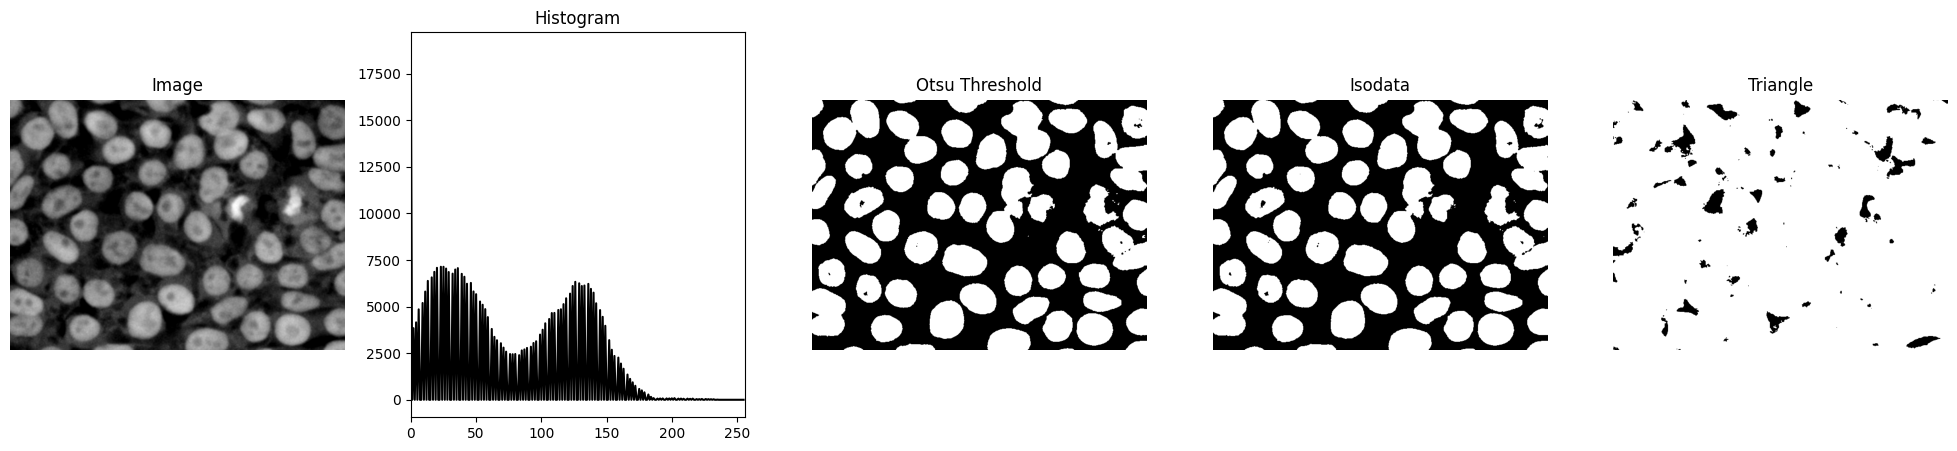

In [57]:
# Nuclei
img = cv2.imread("Nuclei.png", cv2.IMREAD_GRAYSCALE)
# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Otsu's Method
ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#IsoData method
t = 0.4
while True:
    # Create a boolean mask where True represents values less than the threshold
    mask = img < t*255
    # Calculate the mean of elements that satisfy the condition
    mu1 = np.mean(img[mask])
    mask2 = img >= t*255
    mu2 = np.mean(img[mask2])
    
    tNew = ((mu1 + mu2)/2)/255

    if (abs(t - tNew) < 0.01):
       break
    t = tNew
    # print("Isodata Threshold = "+ t.astype(str))


ret2,th2 = cv2.threshold(img,int(255*t),255,cv2.THRESH_BINARY)

### Triangle method
## Find max position of histogram
histMaxX = int(hist.argmax())
histMaxY = int(hist[histMaxX])
p1 = np.array([histMaxX,histMaxY])

## find highest grey value
# Find the indices (bins) where the highest non-zero values occur
non_zero_indices = np.where(hist > 0)
# Find the bin with the highest non-zero value
greyMaxX = 0
for idx, val in np.ndenumerate(hist):
    #print("idx: " + str(idx) + " val: " +  str(int(val)))
    if int(val) > 0:
        greyMaxX = idx[0]
#print(greyMaxX)
greyMaxY = int(hist[greyMaxX])
p2 = np.array([greyMaxX,greyMaxY])

# draw the line and get an array
# Calculate the slope (m) and y-intercept (b) of the line
m = (p2[1] - p1[1]) / (p2[0] - p1[0])
b = p1[1] - m * p1[0]

# Create an array of length 256 and initialize with zeros
line_array = np.zeros(256, dtype=int)

# Calculate the corresponding y-values and assign them to the array
x_values = np.arange(256)
valid_indices = (x_values >= p1[0]) & (x_values <= p2[0])
line_array[valid_indices] = (m * x_values[valid_indices] + b).astype(int)

# find longest height distance between line and grey value
dist = 0
t_tri = 0
for i in range(histMaxX+1,greyMaxX-1):
    p3 = np.array([i,int(hist[i])])
    d = line_array[i] - p3[1]
    #print(str(d) + str(p1) + str(p2) + str(p3))
    if (d > dist):
        t_tri = i
        dist = d

# print(p1)
# print(p2)
#print('dist = ' + str(dist) + ' at: ' + str(t_tri))
ret3,th3 = cv2.threshold(img,int(t_tri),255,cv2.THRESH_BINARY)

#### Create a figure with three subplots###
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# Plot the image in the first subplot
ax1.set_title('Image')
ax1.imshow(img, cmap='gray')
ax1.axis('off')

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(hist, color='black')
ax2.set_xlim([0, 256])

# Otsu's
ax3.set_title('Otsu Threshold')
ax3.imshow(th1, cmap='gray')
ax3.axis('off')

# Isodata
ax4.set_title('Isodata')
ax4.imshow(th2, cmap='gray')
ax4.axis('off')

# Triangle
ax5.set_title('Triangle')
ax5.imshow(th3, cmap='gray')
ax5.axis('off')


plt.show()



C:\Users\shady\AppData\Local\Temp\ipykernel_35164\2735711239.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histMaxY = int(hist[histMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_35164\2735711239.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  greyMaxY = int(hist[greyMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_35164\2735711239.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p3 = np.array([i,int(hist[i])])


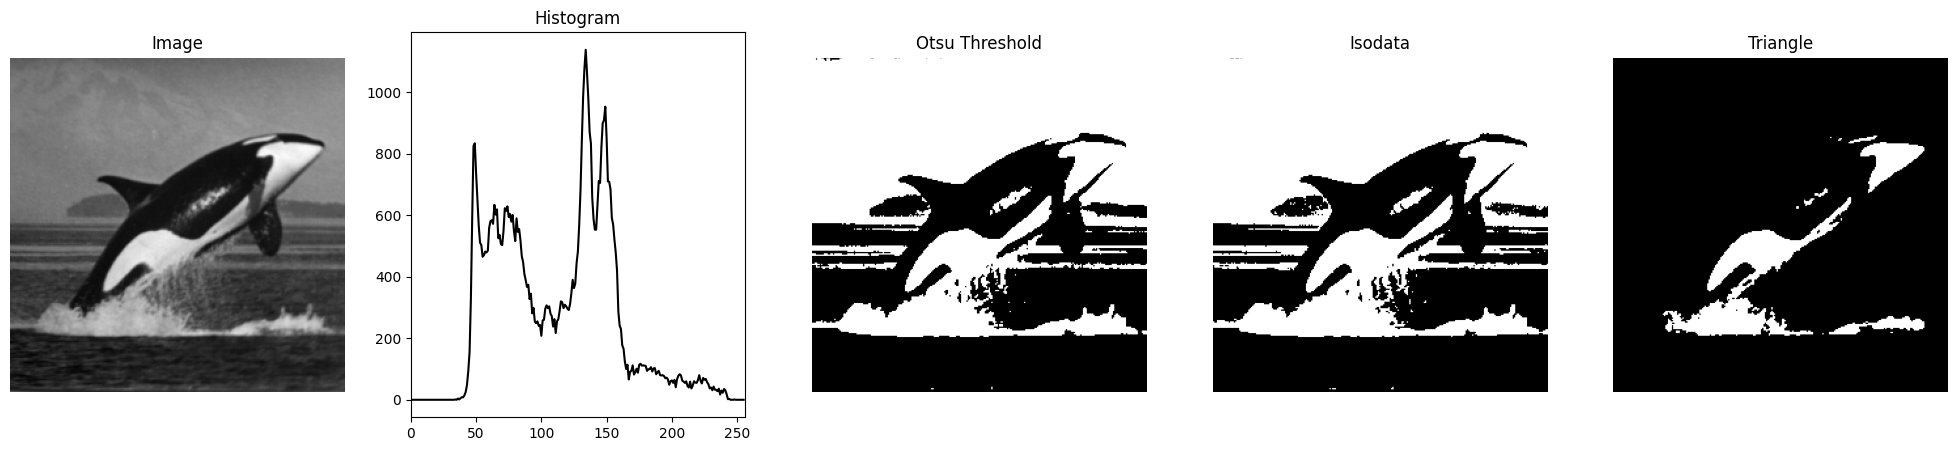

In [58]:
#Orca
img = cv2.imread("Orca.png", cv2.IMREAD_GRAYSCALE)
# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Otsu's Method
ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#IsoData method
t = 0.4
while True:
    # Create a boolean mask where True represents values less than the threshold
    mask = img < t*255
    # Calculate the mean of elements that satisfy the condition
    mu1 = np.mean(img[mask])
    mask2 = img >= t*255
    mu2 = np.mean(img[mask2])
    
    tNew = ((mu1 + mu2)/2)/255

    if (abs(t - tNew) < 0.01):
       break
    t = tNew
    # print("Isodata Threshold = "+ t.astype(str))


ret2,th2 = cv2.threshold(img,int(255*t),255,cv2.THRESH_BINARY)

### Triangle method
## Find max position of histogram
histMaxX = int(hist.argmax())
histMaxY = int(hist[histMaxX])
p1 = np.array([histMaxX,histMaxY])

## find highest grey value
# Find the indices (bins) where the highest non-zero values occur
non_zero_indices = np.where(hist > 0)
# Find the bin with the highest non-zero value
greyMaxX = 0
for idx, val in np.ndenumerate(hist):
    #print("idx: " + str(idx) + " val: " +  str(int(val)))
    if int(val) > 0:
        greyMaxX = idx[0]
#print(greyMaxX)
greyMaxY = int(hist[greyMaxX])
p2 = np.array([greyMaxX,greyMaxY])

# draw the line and get an array
# Calculate the slope (m) and y-intercept (b) of the line
m = (p2[1] - p1[1]) / (p2[0] - p1[0])
b = p1[1] - m * p1[0]

# Create an array of length 256 and initialize with zeros
line_array = np.zeros(256, dtype=int)

# Calculate the corresponding y-values and assign them to the array
x_values = np.arange(256)
valid_indices = (x_values >= p1[0]) & (x_values <= p2[0])
line_array[valid_indices] = (m * x_values[valid_indices] + b).astype(int)

# find longest height distance between line and grey value
dist = 0
t_tri = 0
for i in range(histMaxX+1,greyMaxX-1):
    p3 = np.array([i,int(hist[i])])
    d = line_array[i] - p3[1]
    #print(str(d) + str(p1) + str(p2) + str(p3))
    if (d > dist):
        t_tri = i
        dist = d

# print(p1)
# print(p2)
#print('dist = ' + str(dist) + ' at: ' + str(t_tri))
ret3,th3 = cv2.threshold(img,int(t_tri),255,cv2.THRESH_BINARY)

#### Create a figure with three subplots###
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# Plot the image in the first subplot
ax1.set_title('Image')
ax1.imshow(img, cmap='gray')
ax1.axis('off')

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(hist, color='black')
ax2.set_xlim([0, 256])

# Otsu's
ax3.set_title('Otsu Threshold')
ax3.imshow(th1, cmap='gray')
ax3.axis('off')

# Isodata
ax4.set_title('Isodata')
ax4.imshow(th2, cmap='gray')
ax4.axis('off')

# Triangle
ax5.set_title('Triangle')
ax5.imshow(th3, cmap='gray')
ax5.axis('off')


plt.show()




Otsu's method provides good seperation of classes for all the data sets. In Hardware, the nuts and bolts are clearly seperated from the backgound. Although it is an example of extreme contrast Otsu accels in seperating the background and the foreground. Unfortunately it mistakes some of the head of the bolt due to low contrast different. In situations where there is a bimodal such as Orca and Nuclei, Otsu also does a good job of seperating the foreground and background. Otsu may struggle a little in areas with gradients and detailed images however the datasets here show multi-modal peaks and good contrast to begin with

The iso-data method similarly excels in multimodal images and images with a clear background seperations to the forground.

The triangle method outright failed in the extreme high contrast scenario of hardware. This is likely due to less data points being able to be thresholded near the peak of the histogram which the algorithm cannot determine a threshold point. Additionally in the nuclei data set triangle method falls most likely due to the smooth and bimodal nature of the dataset. However in orca it applies the thresholding differently to the other data types as it focuses on the peak of the data does thresholding occuring on the highest data peak. This may be ideal in some scenarios where the background is dark such as images of stars.